## Q2. Use  the  Admission dataset to perform the following task. 

### PART-1

#### Implement logistic regression model to predict if the student will get admit

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("../input_data/AdmissionDataset/data.csv")
df_r, df_c = dataset.shape #without drop
# print "Dataset: ", rows, cols
target = 'Chance of Admit '

In [3]:
dataset = dataset.drop(['Serial No.'], axis=1)

In [4]:
#normalise dataframe
def normalise(df):
    global target
    cols = df.columns
    for c in cols:
        if c != target:
            sd = df[c].std()
            mean = df[c].mean()
            
            df[c] = (df[c] - mean)/sd
    return df
dataset = normalise(dataset)
# print dataset

In [5]:
# dataset = dataset.sample(frac=1)
train, validate = np.split(dataset, [int(.8*len(dataset))])
train_rows = train.shape[0]


In [6]:
def makeX(df):
    if target in df.columns:
        df = df.drop([target], axis=1)
    X = df.values
    X = np.insert(X, 0, values=1, axis=1)
    return X
matrix = makeX(train)

initTheta: n: no.of columns in matrix

In [7]:
def initTheta(n):
    theta = np.zeros(n - 2 + 1) #remove chance of admit, serial no. add 1 b0 col
    return theta

#### Gradient Descent params:
- mat: feature matrix from training
- actual: actual predicted values, from train[target]
- eta: learning rate 

In [8]:
def gradientDescent(mat, actual, eta):
    mat_tr = mat.transpose()
    ilist = []
    clist = []
    theta = initTheta(df_c) #df_c: no of columns in original dataframe
    for i in range(0, 1000):
        pred = np.dot(mat, theta)
        loss = pred - actual
        cost = np.sum((loss)**2) / (2 * train_rows)
        ilist.append(i)
        clist.append(cost)
        gradient = np.dot(mat_tr, loss) / train_rows
        theta = theta - eta * gradient
    return theta, ilist, clist

#### forAllAlpha
- matrix: feature matrix from training data

In [9]:
def forAllAlpha(matrix):    
    alpha = [0.001, 0.005, 0.01, 0.1]
    for i in alpha:
        theta, iter, cost = gradientDescent(matrix, train[target], i)
        plotGraphs(iter,cost,i, "Iteration", "Cost")

In [10]:
def plotGraphs(x,y,i, xaxis, yaxis):
    title = xaxis + " vs " + yaxis
    fig, axes = plt.subplots(figsize=(4, 4))
    axes.plot(x, y, label=i)
    axes.grid(True)
    axes.set_xlabel(xaxis)
    axes.set_ylabel(yaxis)
    axes.legend(loc='best')
    name = title+"_"+str(i)+".png"
    axes.set_title(title)
    fig.savefig(name)

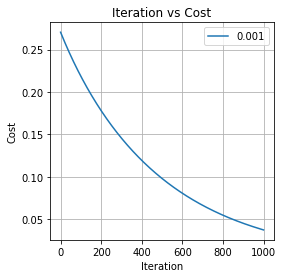

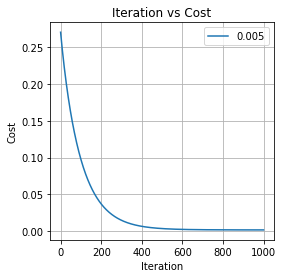

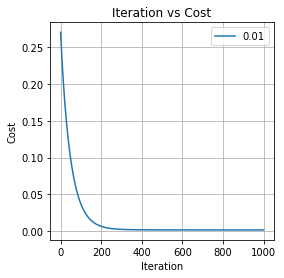

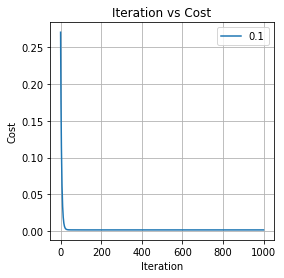

In [11]:
forAllAlpha(matrix)

#### for all values of threshold

In [12]:
validate_m = makeX(validate) # make feature matrix of validate

In [13]:
def createCM(predicted, actual):
    pred = pd.Series(predicted, name='Predicted')
    actu = pd.Series(actual,    name='Actual')
    conf = pd.crosstab(actu, pred)
    return conf


In [14]:
def findMeasures(actual, predict):
    tp,tn,fn,fp = 0,0,0,0
    for i in range(len(actual)):
        if actual[i] == 0 and predict[i] == 0:
            tn += 1
        elif actual[i] == 1 and predict[i] == 1:
            tp += 1
        elif actual[i] == 1 and predict[i] == 0:
            fn += 1
        else:
            fp += 1
#     print "TP, TN, FP, FN: ",tp,tn,fp,fn
    
    confusion_matrix = createCM(predict, actual)
    
    diag = 0
    tot = 0
    for i in confusion_matrix:
        diag += confusion_matrix[i][i]
        tot += confusion_matrix[i].sum()
   
    accuracy = float(diag)/tot
    try:
        precision = float(tp) / (tp + fp)
    except:
        precision = 0
    
    try:
        recall = float(tp) / (tp + fn)
    except:
        recall = 0
    return accuracy*100, precision, recall




In [15]:
def predictForAllThreshold(train_mat, target_col, alpha, toBePredicted, threshold): 

    reqd_theta, reqd_ilist, reqd_clist = gradientDescent(train_mat, target_col, alpha)
    y_matrix = np.dot(toBePredicted, reqd_theta)
    predict = 1.0 / (1 + np.exp(-y_matrix)) #sigmoid function
    class_predict = []
    for p in predict:
        if p <= threshold:
            class_predict.append(0)
        else: 
            class_predict.append(1)
#     print "classes: ", len(class_predict)
    
    return class_predict


def findAllPredicts(train_mat, target_col, alpha, validate_mat, validate_df):
    threshold_arr = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    p_arr = []
    r_arr = []
    for i in threshold_arr: #iterate for [0.1,0.2..0.9]
        i_predict = predictForAllThreshold(train_mat, target_col, alpha, validate_mat, i)
        i_actual = actualClassesForAllThreshold(validate_df, i)
        i_precision = findMeasures(i_actual, i_predict)[1]
        i_recall = findMeasures(i_actual, i_predict)[2]
        temp = [i, i_precision]
        p_arr.append(i_precision)
        r_arr.append(i_recall)
    return threshold_arr, p_arr, r_arr        

def actualClassesForAllThreshold(df,threshold): #df for which actual classes is to be found.
    target_col = validate[target]
    target_m = target_col.values
#     print target_m
    class_actual = []
    for t in target_m:
        if t <= threshold:
            class_actual.append(0)
        else:
            class_actual.append(1)
#     print "actual len class: ",len(class_actual)
    return class_actual

In [16]:
x,yp, yr = findAllPredicts(matrix, train[target], 0.1, validate_m, validate)

### -> PART 3 Plot a graph explaining the co-relation between threshold valuevs precision and recall.  Report the criteria one should use while deciding the thresh-old value.  Explain the reason behind your choice of threshold in your model.

Text(0,0.5,'Recall')

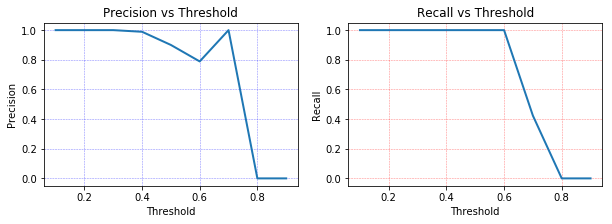

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x,yp, lw=2)
axes[0].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[0].set_title("Precision vs Threshold")
axes[0].set_xlabel("Threshold")
axes[0].set_ylabel("Precision")
# custom grid appearance
axes[1].plot(x, yr, lw=2)
axes[1].grid(color='r', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[1].set_title("Recall vs Threshold")
axes[1].set_xlabel("Threshold")
axes[1].set_ylabel("Recall")

#### The threshold of a logistic regression tells whether a prediction is positive or not.
#### A good threshold value is the one which maximises both sensitivity(Recall) and specificity(Precision).
#### So their intersection gives the optimal threshold. In the given dataset , 0.3 gives the max accuracy, precision, recall. So it is chosen as the threshold value

## We see that alpha = 0.1 has the best convergence rate. So we use theta for alpha 0.1. and 0.3 threshold 

In [18]:
def predict(train_mat, target_col, alpha, toBePredicted): 

    reqd_theta, reqd_ilist, reqd_clist = gradientDescent(train_mat, target_col, alpha)
    y_matrix = np.dot(toBePredicted, reqd_theta)
    predict = 1.0 / (1 + np.exp(-y_matrix)) #sigmoid function
   
    class_predict = []
    for p in predict:
        if p <= 0.3:
            class_predict.append(0)
        else: 
            class_predict.append(1)
   
    
    return class_predict
y_predict = predict(matrix, train[target], 0.1, validate_m)

def actualClasses(validate):
    target_col = validate[target]
    target_m = target_col.values

#     print target_m
    class_actual = []
    for t in target_m:
        if t <= 0.3:
            class_actual.append(0)
        else:
            class_actual.append(1)
  
    return class_actual
y_actual = actualClasses(validate)
a,p,r = findMeasures(y_actual, y_predict)
print "accuracy: ",a,"%"
print "precision: ",p
print "recall: ",r

accuracy:  100.0 %
precision:  1.0
recall:  1.0
